In [2]:
from sklearn.datasets import load_boston
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.DataFrame(pd.read_csv('german.data-numeric.txt',header=-1,delimiter='\\s+'))

In [4]:
data.head()

0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  21  22  \
0   1   6   4  12   5   5   3   4   1  67 ...   0   0   1   0   0   1   0   0   
1   2  48   2  60   1   3   2   2   1  22 ...   0   0   1   0   0   1   0   0   
2   4  12   4  21   1   4   3   3   1  49 ...   0   0   1   0   0   1   0   1   
3   1  42   2  79   1   4   3   4   2  45 ...   0   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53 ...   1   0   1   0   0   0   0   0   

   23  24  
0   1   1  
1   1   2  
2   0   1  
3   1   1  
4   1   2  

[5 rows x 25 columns]

In [28]:
data.describe()

0            1           2            3            4   \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      2.577000    20.903000     2.54500    32.711000     2.105000   
std       1.257638    12.058814     1.08312    28.252605     1.580023   
min       1.000000     4.000000     0.00000     2.000000     1.000000   
25%       1.000000    12.000000     2.00000    14.000000     1.000000   
50%       2.000000    18.000000     2.00000    23.000000     1.000000   
75%       4.000000    24.000000     4.00000    40.000000     3.000000   
max       4.000000    72.000000     4.00000   184.000000     5.000000   

                5           6            7            8            9   \
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean      3.384000     2.68200     2.845000     2.358000    35.546000   
std       1.208306     0.70808     1.103718     1.050209    11.375469   
min       1.000000     1.00000     1.000000     1.000000    19.000000   
25%       3.000000     2.00000     2.000000     1.000000    27.000000   
50%       3.000000     3.00000     3.000000     2.000000    33.000000   
75%       5.000000     3.00000     4.000000     3.000000    42.000000   
max       5.000000     4.00000     4.000000     4.000000    75.000000   

          ...                15           16           17           18  \
count     ...       1000.000000  1000.000000  1000.000000  1000.000000   
mean      ...          0.234000     0.103000     0.907000     0.041000   
std       ...          0.423584     0.304111     0.290578     0.198389   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     1.000000     0.000000   
50%       ...          0.000000     0.000000     1.000000     0.000000   
75%       ...          0.000000     0.000000     1.000000     0.000000   
max       ...          1.000000     1.000000     1.000000     1.000000   

                19           20           21         22           23  \
count  1000.000000  1000.000000  1000.000000  1000.0000  1000.000000   
mean      0.179000     0.713000     0.022000     0.2000     0.630000   
std       0.383544     0.452588     0.146757     0.4002     0.483046   
min       0.000000     0.000000     0.000000     0.0000     0.000000   
25%       0.000000     0.000000     0.000000     0.0000     0.000000   
50%       0.000000     1.000000     0.000000     0.0000     1.000000   
75%       0.000000     1.000000     0.000000     0.0000     1.000000   
max       1.000000     1.000000     1.000000     1.0000     1.000000   

                24  
count  1000.000000  
mean      1.300000  
std       0.458487  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  

[8 rows x 25 columns]

In [5]:
X = np.array(data[np.arange(24)])
y = np.array(data[24]) - 1

In [6]:
clf=DecisionTreeClassifier(random_state=1)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

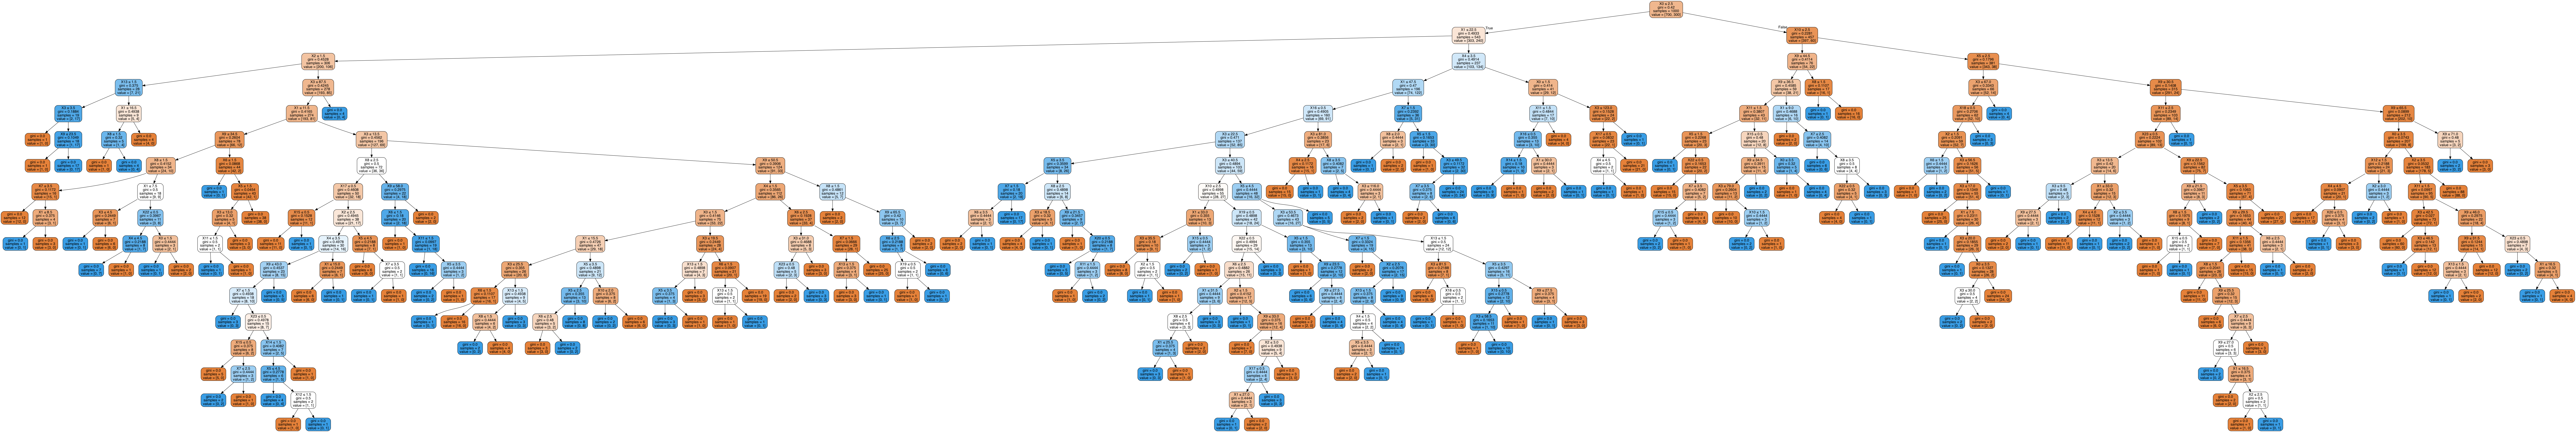

In [7]:
dot_data = tree.export_graphviz(clf, out_file="tree.out", 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())  

In [8]:
f = open('tree.png', 'wb')
f.write(graph.create_png())
f.close()

вообще опасно интерпретировать решающие деревья)

Верхняя часть полученного дерева: 

![](top.png)



Значения признаков:

X0 -  Status of existing checking account, salary assignments for at least 1 year

X10 - Present residence since

X1 - Duration in month

То есть самым главным критерием является количество средств на текущем аккаунте и если средств больше 200 DM или аккаунта еще не было, то кредит будет получен с большей вероятностью.

Посмотрим результаты 4CV-fold

In [21]:
def benchmark(clfr,params,label,hmax=5):
    scores = []
    for h in range(1,hmax):
        params['max_depth'] = h
        clf = clfr(**params)
        scores.append(np.mean(cross_validation.cross_val_score(clf,X,y,n_jobs=4,scoring=make_scorer(accuracy_score),cv=4)))
    plt.plot(np.arange(1,hmax),scores,label=label)
    print('best depth: ' + str(np.argmax(scores)+1) + ', best accuracy: ' + str(np.max(scores)))

best depth: 4, best accuracy: 0.743


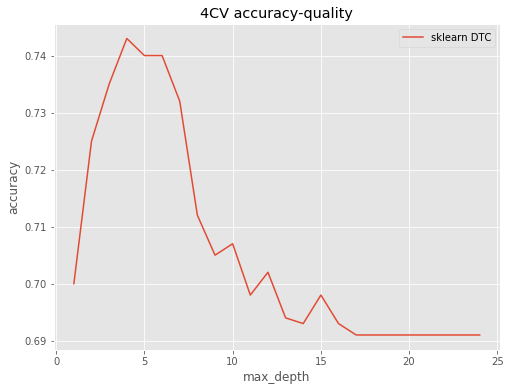

CPU times: user 36 s, sys: 5.28 s, total: 41.3 s
Wall time: 44.6 s


In [22]:
%%time
hmax=25
plt.figure(figsize=(8,6))
plt.title('4CV accuracy-quality')
benchmark(DecisionTreeClassifier,{},'sklearn DTC',hmax)
plt.legend(loc='best')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()

Видно, что с определенного момента качество перестает меняться. Лучшее качество получается при глубине 4. (random_state не фиксировался, чтобы избежать корреляции деревьев, все усреднение происходит за счет кросс-валидации)

а теперь качество на обучающих данных:

In [33]:
def selfpredict(clfr,params,label,hmax=5,rep=4):
    scores = []
    for h in range(1,hmax):
        params['max_depth'] = h
        cur = []
        for i in range(rep):
            clf = clfr(**params)
            clf.fit(X,y)
            cur.append(accuracy_score(y, clf.predict(X)))
        scores.append(np.mean(cur))
    plt.plot(np.arange(1,hmax),scores,label=label)
    print('best depth: ' + str(np.argmax(scores)+1) + ', best accuracy: ' + str(np.max(scores)))

best depth: 16, best accuracy: 1.0


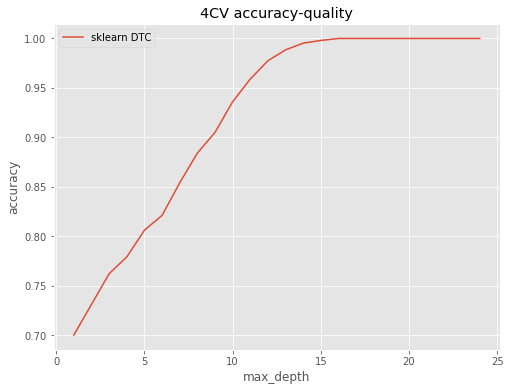

CPU times: user 515 ms, sys: 9.13 ms, total: 525 ms
Wall time: 526 ms


In [34]:
%%time
hmax=25
plt.figure(figsize=(8,6))
plt.title('4CV accuracy-quality')
selfpredict(DecisionTreeClassifier,{},'sklearn DTC',hmax)
plt.legend(loc='best')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()

Видно, что с определенной глубины все объекты обучающей выборки начинают классифицироваться правильно. Это логично, так как примерно к тому моменту $2^{depth_{max}} \sim \#_{objects}$ и каждый объект может классифицироваться своим листом(это можно считать переобучением). Здесь использовалось усреднение по 4 случайным запускам, так как random_state опять не фиксировался.